<a href="https://colab.research.google.com/github/Saranya003/TASK_6/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [35]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

1. Find the linear regression equation for this data.

In [36]:
#missing values in the given series object
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [37]:
# show the columns and rows of the dataset
#fetch the dimensions of Pandas and NumPy type objects
df.shape

(15, 2)

In [38]:
# mean, standard deviation, min, max 
#calculating some statistical data like percentile, mean and std of the numerical value
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [39]:
#number of columns, column labels, column data types, memory usage, range index, and 
#the number of cells in each column (non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [40]:
reg_model = linear_model.LinearRegression()


In [41]:
grnd_temp = df[['Ground Temperature']]
grnd_temp.head(3)

,Ground Temperature
0,88.6
1,71.6
2,93.3


In [42]:
chirps_sec = df['Chirps/Second']
chirps_sec.head(3)

0    20.0
1    16.0
2    19.8
Name: Chirps/Second, dtype: float64

In [43]:
reg_model.fit(grnd_temp,chirps_sec)

LinearRegression()

In [44]:
reg_model.coef_

array([0.20299973])

In [45]:
reg_model.intercept_

0.45931464523595267

In [46]:
# Find the linear regression equation for this data.
print(f'Linear Regression Equation: y = {reg_model.coef_[0]:.4f} * x + {reg_model.intercept_:.4f}')

Linear Regression Equation: y = 0.2030 * x + 0.4593


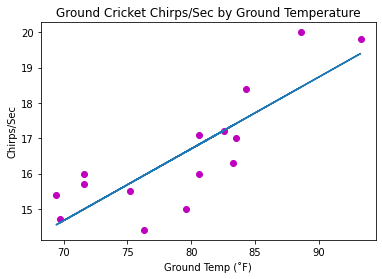

In [47]:
#Chart the original data and the equation on the chart.
plt.scatter(grnd_temp, chirps_sec, color='m')
plt.plot(grnd_temp, reg_model.predict(grnd_temp))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [48]:
#Find the equation's R2 score
r_sq = reg_model.score(grnd_temp, chirps_sec)
print(f'R^2 score : {r_sq:.4f} ')

R^2 score : 0.6923 


In [49]:
#Extrapolate data
x = 95
chirps_data = reg_model.coef_[0] * x + reg_model.intercept_
print(chirps_data)

19.74428912896875


In [50]:
#Interpolate data:
temp_data = (18 - reg_model.intercept_) / reg_model.coef_[0]
print(temp_data)

86.40743134548568


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [51]:
df = pd.read_fwf("brain_body.txt")

In [52]:
reg_model_bb = linear_model.LinearRegression()


In [53]:
brain_wt = df[['Brain']]
brain_wt.head(3)

,Brain
0,3.385
1,0.480
2,1.350


In [54]:
body_wt = df['Body']
body_wt.head(3)

0    44.5
1    15.5
2     8.1
Name: Body, dtype: float64

In [55]:
reg_model_bb.fit(brain_wt,body_wt)

LinearRegression()

In [56]:
reg_model_bb.coef_[0]

0.9664963676725759

In [57]:
reg_model_bb.intercept_

91.00439620740687

In [58]:
#Find the linear regression equation for this data for brain weight to body weight.
print(f'Linear Regression Equation: y = {reg_model.coef_[0]:.4f} * x + {reg_model.intercept_:.4f}')

Linear Regression Equation: y = 0.2030 * x + 0.4593


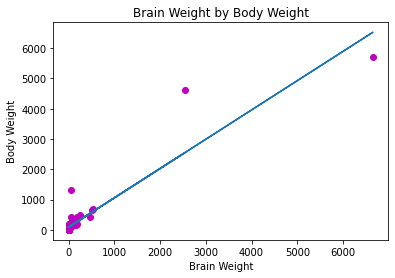

In [59]:
#Chart the original data and the equation on the chart.
plt.scatter(brain_wt, body_wt, color='m')
plt.plot(brain_wt, reg_model_bb.predict(brain_wt))
plt.title('Brain Weight by Body Weight')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

In [60]:
r_sq_bb = reg_model_bb.score(brain_wt, body_wt)
r_sq_bb

0.8726620843043331

In [61]:
#Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data.
print(f'R^2 score for this equation: {r_sq_bb:.4f} ')
if r_sq_bb > 0.8000:
  print('According to R-Squared value, this model is a good fit for the data')
else:
  print('According to R-Squared value, this model is not a good fit for the data')

R^2 score for this equation: 0.8727 
According to R-Squared value, this model is a good fit for the data


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [62]:
df = pd.read_fwf("salarys.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [63]:
df.shape

(52, 6)

In [64]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [66]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [70]:
X = df.iloc[ : , :5]
print(X.head(3))
print("***************************************")
y = df['Salary']
print(y.head(3))

   Sex  Rank  Year  Degree  YSdeg
0    0     3    25       1     35
1    0     3    13       1     22
2    0     3    10       1     23
***************************************
0    36350
1    35350
2    28200
Name: Salary, dtype: int64


In [71]:
model = linear_model.LinearRegression()
model.fit(X,y)


LinearRegression()

In [72]:
model.coef_

array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354])

In [73]:
model.intercept_

11410.14654725559

In [75]:
#Find the linear regression equation for this data using columns 1-5 to column 6.
print(f'The linear regression equation for this data for Sex, Rank, Year, Degree, YSdeg to Salary is : \
        eqn_sd = {model.coef_[0]:.4f} * x + {model.intercept_:.4f} ')

The linear regression equation for this data for Sex, Rank, Year, Degree, YSdeg to Salary is :         eqn_sd = 1241.7925 * x + 11410.1465 
